In [0]:
path="C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/Image"
path1="C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/Low"

238

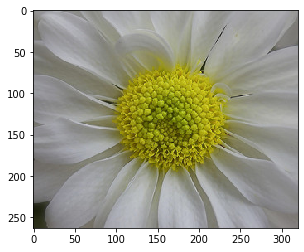

In [0]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/Image/image0000.png")  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
l = img.max()
plt.imshow(img)
l

47

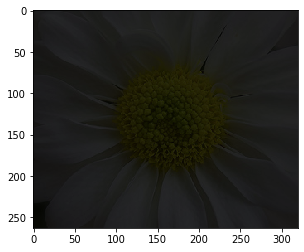

In [0]:
import cv2
img = cv2.imread("C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/Low/image0000.png")  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
l = img.max()
plt.imshow(img)
l

In [0]:
import glob
import numpy as np
a=[]
b=[]
filenames = glob.glob(path + "/*.png") #read all files in the path mentioned
for x in filenames:
    image=cv2.imread(x)
    image=cv2.resize(image, ((256, 256)))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    b.append(img)
b=np.array(b)

In [0]:
file = glob.glob(path1 + "/*.png") #read all files in the path mentioned
for x1 in file:
    im=cv2.imread(x1)
    im=cv2.resize(im, ((256, 256)))
    img1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    a.append(img1)
a=np.array(a)

In [0]:
import numpy as np 
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape, Activation, Dropout, Conv2DTranspose
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.clear_session()
def InstantiateModel(inputs):
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(inputs)
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(pool1)
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(pool2)
    conv3 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(pool3)
    conv4 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(pool4)
    conv5 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(conv5)

    up6 = Conv2D(256, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv5))
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(256,(3, 3), activation = 'relu', padding = 'same')(merge6)
    conv6 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(conv6)

    up7 = Conv2D(128, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(merge7)
    conv7 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(conv7)

    up8 = Conv2D(64, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(merge8)
    conv8 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(conv8)

    up9 = Conv2D(32, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(merge9)
    conv9 = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(conv9)
    
    conv10 = Conv2D(3, (3, 3), activation = 'relu', padding = 'same')(conv9)
    return conv10

In [0]:
i = Input(shape=(256, 256,3))
o = InstantiateModel(i)
enhancer = Model(inputs=i, outputs=o)
enhancer.compile(optimizer="adam", loss='mean_squared_error')
enhancer.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [0]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,256, 256,3)
        y_input = y[i].reshape(1,256, 256,3)
        yield (X_input,y_input)
enhancer.fit_generator(GenerateInputs(a,b),epochs=100,verbose=1,steps_per_epoch=20,shuffle=True)

Epoch 1/100
20/20 [==============================] - 46s 2s/step - loss: 54052.9158
Epoch 2/100
20/20 [==============================] - 47s 2s/step - loss: 12719.9412
Epoch 3/100
20/20 [==============================] - 45s 2s/step - loss: 6547.7826
Epoch 4/100
20/20 [==============================] - 46s 2s/step - loss: 5146.8502
Epoch 5/100
20/20 [==============================] - 48s 2s/step - loss: 1569.0829
Epoch 6/100
20/20 [==============================] - 44s 2s/step - loss: 1685.5843
Epoch 7/100
20/20 [==============================] - 45s 2s/step - loss: 1445.3473
Epoch 8/100
20/20 [==============================] - 45s 2s/step - loss: 1672.6448
Epoch 9/100
20/20 [==============================] - 46s 2s/step - loss: 1219.5390
Epoch 10/100
20/20 [==============================] - 44s 2s/step - loss: 1178.8212
Epoch 11/100
20/20 [==============================] - 45s 2s/step - loss: 680.1979
Epoch 12/100
20/20 [==============================] - 49s 2s/step - loss: 584.6856
E

20/20 [==============================] - 25s 1s/step - loss: 15.9952


In [0]:
enhancer.save_weights("C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/modelx1.h5")
enhancer.load_weights("C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/modelx1.h5")

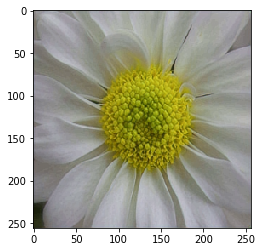

In [0]:
ImagePath=cv2.imread("C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/Low/image0000.png")
ImagePath=cv2.cvtColor(ImagePath, cv2.COLOR_BGR2RGB)
I=cv2.resize(ImagePath, ((256, 256)))
I = I.reshape(1, 256,256,3)
Prediction = enhancer.predict(I)
I=I.reshape(256, 256, 3)
I[:,:,:] = Prediction[:,:,:]
plt.imshow(I)
plt.show()